In [ ]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize, pos_tag, ne_chunk

nltk.download("maxent_ne_chunker")
nltk.download("words")
nltk.download("averaged_perceptron_tagger")
nltk.download("punkt")
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))


def is_noise(word):
    return (
        word.lower() in stop_words
        or word.isdigit()
        or re.match(r"^\W+$", word) is not None
        or re.match(r"[\U0001F600-\U0001F64F]", word) is not None
    )


def is_named_entity(token):
    tagged_token = pos_tag([token])
    chunk = ne_chunk(tagged_token)
    for subtree in chunk:
        if hasattr(subtree, "label"):
            return True
    return False


def normalize(column):
    return (column - column.min()) / (column.max() - column.min())

In [31]:
base = pd.read_csv('data/BASIL/babe.csv').rename(columns={'Unnamed: 0':'token'})
synth = pd.read_csv('data/BASIL/synth.csv').rename(columns={'Unnamed: 0':'token'})

# cast to strings (some tokens are numbers)
base['token'] = base['token'].astype(str)
synth['token'] = synth['token'].astype(str)

# remove stopwords, numbers, emojis, etc.
base = base[~base["token"].apply(is_noise)]
synth = synth[~synth["token"].apply(is_noise)]

# only consider non-negative attributions 
base = base[base['attribution'] >= 0]
synth = synth[synth['attribution'] >= 0]

### average attributions to Named Entities

base attribution:  0.10766426898312116
synth attribution:  0.10545652558672416


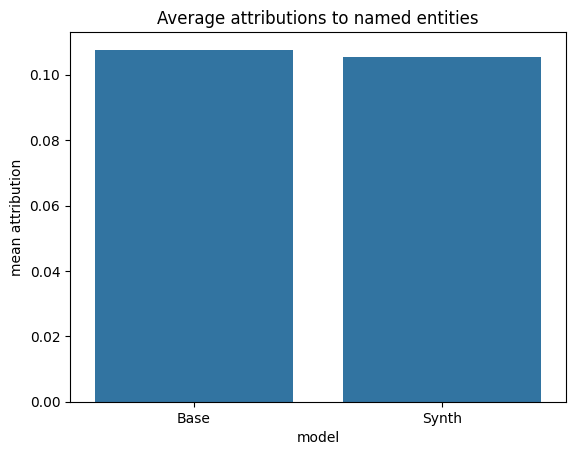

In [32]:
base_mean = base[base['token'].apply(is_named_entity)]['attribution'].mean()
synth_mean = synth[synth['token'].apply(is_named_entity)]['attribution'].mean()

data = pd.DataFrame({
    'model': ['Base','Synth'],
    'mean Attribution': [base_mean, synth_mean]
})
sns.barplot(x='model', y='mean Attribution', data=data)

plt.xlabel('model')  # Label for x-axis
plt.ylabel('mean attribution')  # Label for y-axis
plt.title('Average attributions to named entities')  # Optional: Add a title


print("base attribution: ",base_mean)
print("synth attribution: ",synth_mean)

### Attributions to spurious list

In [39]:
with open('data/all_list_cm.txt','r') as f:
    cm = [tok.strip('\n') for tok in f.readlines()]

with open('data/all_list_th.txt','r') as f:
    th = [tok.strip('\n') for tok in f.readlines()]

spurious_list = pd.DataFrame({'token':np.intersect1d(cm,th)})

In [47]:
synth['attribution'].sum()

156.56222149892292

In [52]:
print(base.merge(spurious_list,on='token')['attribution'].mean())
print(synth.merge(spurious_list,on='token')['attribution'].mean())

0.14288236335584373
0.1308286561439587


In [41]:
base.merge(spurious_list,on='token').sort_values(by='attribution',ascending=False)[:30]

,token,attribution,count
16,ego,0.432428,1
51,nowhere,0.429460,1
487,hurl,0.399064,1
483,sidestep,0.380822,1
172,vindictive,0.368796,3
448,backwards,0.368213,1
411,Darwinists,0.363373,1
389,wisdom,0.340871,1
181,collusion,0.339082,1
228,bluster,0.335403,1


In [42]:
synth.merge(spurious_list,on='token').sort_values(by='attribution',ascending=False)[:30]

,token,attribution,count
19,ego,0.595521,1
147,crow,0.531542,1
459,stole,0.470040,1
58,nowhere,0.456064,1
226,pounce,0.423495,1
442,backwards,0.415840,1
373,undermined,0.400304,1
236,billionaire,0.393763,1
121,condescend,0.393710,1
311,nut,0.378108,1
